<a href="https://colab.research.google.com/github/aoifekeane/EE475-Project/blob/main/multi_class_key_keys_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class classifer for keys
This notebook detials the creation and evaluation of a model designed to classify keys in a piece of music

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

importing dependencies

In [ ]:
seed = 201715226

random seed for repeatablity

In [ ]:
import glob
import tensorflow as tf
import numpy as np

img_height = 288
img_width = 432

amaj = glob.glob('/content/drive/MyDrive/project/key_images/amaj/*.*')
amin = glob.glob('/content/drive/MyDrive/project/key_images/amin/*.*')
bmin = glob.glob('/content/drive/MyDrive/project/key_images/bmin/*.*')
cmaj = glob.glob('/content/drive/MyDrive/project/key_images/cmaj/*.*')
dmaj = glob.glob('/content/drive/MyDrive/project/key_images/dmaj/*.*')
dmin = glob.glob('/content/drive/MyDrive/project/key_images/dmin/*.*')
emaj = glob.glob('/content/drive/MyDrive/project/key_images/emaj/*.*')
emin = glob.glob('/content/drive/MyDrive/project/key_images/emin/*.*')
fmaj = glob.glob('/content/drive/MyDrive/project/key_images/fmaj/*.*')
gmaj = glob.glob('/content/drive/MyDrive/project/key_images/gmaj/*.*')
gmin = glob.glob('/content/drive/MyDrive/project/key_images/gmin/*.*')
data = []
labels = []

print('amaj')
a = 0
for i in amaj:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
    image=np.array(image)
    data.append(image)
    labels.append(0)
    a+=1
    if a >200:
      break
print('amin')
a = 0
for i in amin:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
    image=np.array(image)
    data.append(image)
    labels.append(1)
    a+=1
    if a >200:
      break

print('bmin')
a = 0
for i in bmin:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
    image=np.array(image)
    data.append(image)
    labels.append(2)
    a +=1
    if a > 200:
      break

print('cmaj')
a = 0
for i in cmaj:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
    image=np.array(image)
    data.append(image)
    labels.append(3)
    a +=1
    if a >200:
      break
print('dmaj')
a = 0
for i in dmaj:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
    image=np.array(image)
    data.append(image)
    labels.append(4)
    a +=1
    if a >200:
      break
print('dmin')
a = 0
for i in dmin:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
    image=np.array(image)
    data.append(image)
    labels.append(5)
    a +=1
    if a >200:
      break
print('emaj')
a = 0
for i in emaj:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
    image=np.array(image)
    data.append(image)
    labels.append(6)
    a +=1
    if a >200:
      break
print('emin')
a = 0
for i in emin:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
    image=np.array(image)
    data.append(image)
    labels.append(7)
    a +=1
    if a >200:
      break
print('fmaj')
a = 0
for i in fmaj:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
    image=np.array(image)
    data.append(image)
    labels.append(8)
    a +=1
    if a >200:
      break
print('gmaj')
a = 0
for i in gmaj:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
    image=np.array(image)
    data.append(image)
    labels.append(9)
    a+=1
    if a >200:
      break
print('gmin')
a = 0
for i in gmin:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
    image=np.array(image)
    data.append(image)
    labels.append(10)
    a+=1
    if a >200:
      break
      
data = np.array(data)
labels = np.array(labels)

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=1 - train_ratio, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=seed) 


amaj
amin
bmin
cmaj
dmaj
dmin
emaj
emin
fmaj
gmaj
gmin


- Importing the imags for each key
- An image here is the chromagram representation of each audio
- Each class is labelled 0 -10 for the 10 classes
- Each class gets a maximum of 200 samples
- Any class with fewer than 200 sample is just fully loaded in to input data
- The data is split into 75% training data, 15% validation data and 10% test data


In [ ]:
class_weights = {0: 1,
                 1 : 1,
                 2: 7.6923,
                 3: 1,
                 4: 1,
                 5: 1,
                 6: 2.98506,
                 7: 1.29032,
                 8: 1,
                 9: 1,
                 10: 1
                 }

- as not all classes have >=200 samples, the classes have to weighted
- weights are determined by the size of the class divided by 200

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
35/35 [==============================] - 7s 174ms/step - loss: 11.4224 - accuracy: 0.1343 - val_loss: 2.3258 - val_accuracy: 0.3165
Epoch 2/10
35/35 [==============================] - 5s 137ms/step - loss: 2.3453 - accuracy: 0.3872 - val_loss: 0.6458 - val_accuracy: 0.7842
Epoch 3/10
35/35 [==============================] - 5s 137ms/step - loss: 0.4706 - accuracy: 0.8547 - val_loss: 0.6407 - val_accuracy: 0.7554
Epoch 4/10
35/35 [==============================] - 5s 138ms/step - loss: 0.2747 - accuracy: 0.9076 - val_loss: 0.4241 - val_accuracy: 0.8849
Epoch 5/10
35/35 [==============================] - 5s 138ms/step - loss: 0.0790 - accuracy: 0.9759 - val_loss: 0.3119 - val_accuracy: 0.9065
Epoch 6/10
35/35 [==============================] - 5s 138ms/step - loss: 0.0400 - accuracy: 0.9904 - val_loss: 0.3410 - val_accuracy: 0.9245
Epoch 7/10
35/35 [==============================] 

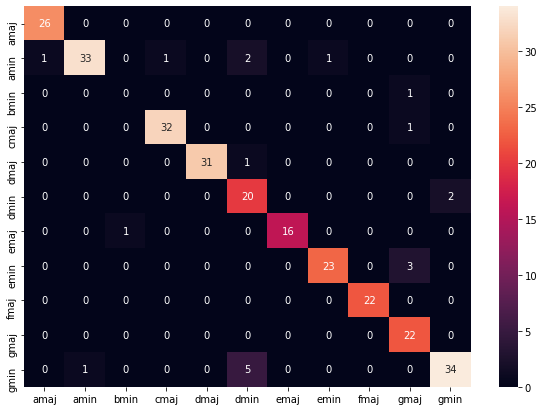

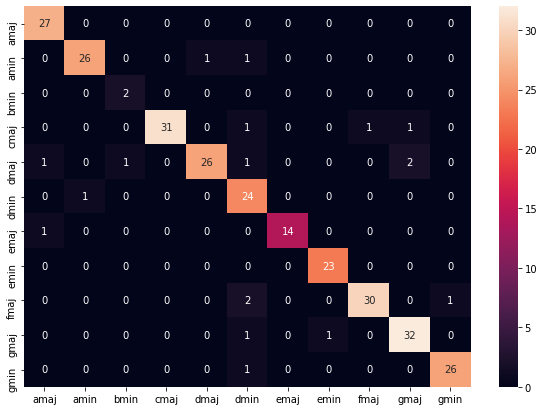

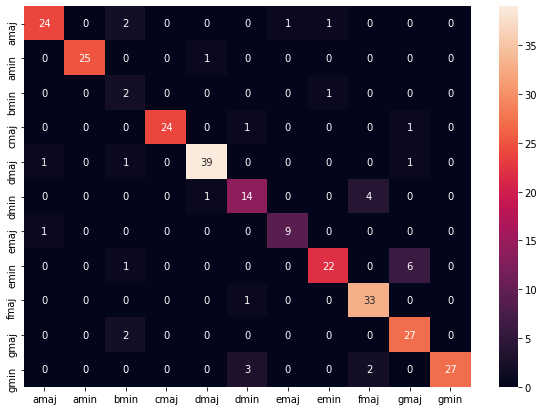

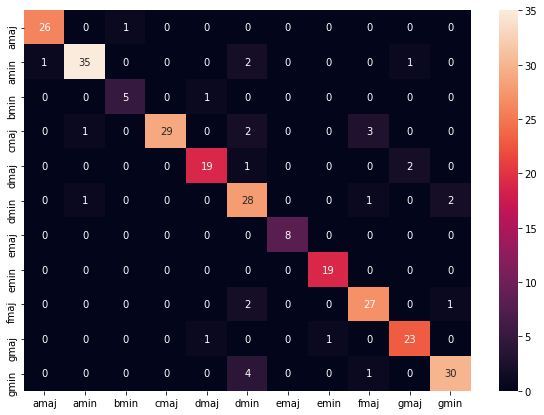

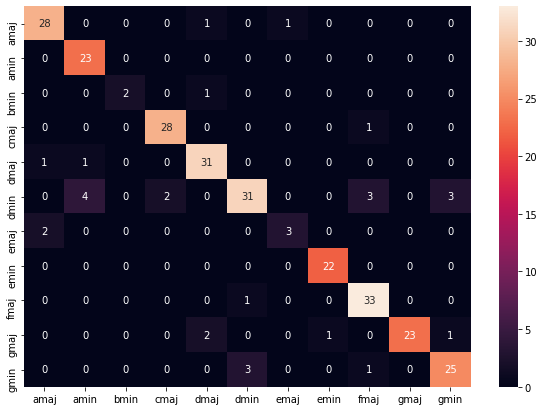

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
inputs = x_train
targets = y_train
kfold = KFold(n_splits=5, shuffle=True, random_state =seed)
acc_per_fold = []
loss_per_fold = []
fold_no = 1
num_classes = 11
folds = []

for train, test in kfold.split(inputs, targets):
  model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_width, img_height, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
  ])
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  epochs=10
  history = model.fit(
    inputs[train], targets[train],
    validation_data= (x_val,y_val),
    epochs=epochs,
    class_weight = class_weights
  )
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])



  fname = '/content/drive/MyDrive/project/multiclass key models/reduced keys more data/kfold/fold'+str(fold_no)
  model.save(fname)
  
  from sklearn.metrics import confusion_matrix
  import seaborn as sn
  import pandas as pd
  import matplotlib.pyplot as plt
  y_pred = model.predict(inputs[test])
  predicted_categories = tf.argmax(y_pred, axis=1)
  true_categories = tf.concat(targets[test], axis=0)
  array = confusion_matrix(predicted_categories, true_categories, normalize=None)
  df_cm = pd.DataFrame(array, index = [i for i in ['amaj', 'amin', 'bmin', 'cmaj', 'dmaj','dmin', 'emaj', 'emin', 'fmaj', 'gmaj', 'gmin']],
                    columns = [i for i in ['amaj', 'amin', 'bmin', 'cmaj', 'dmaj','dmin', 'emaj', 'emin', 'fmaj', 'gmaj', 'gmin']])
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True)
  print(array)
  folds.append(array)
  # Increase fold number
  fold_no = fold_no + 1

- performs 5-fold cross validation, producing 5 models trained on a different configurations of data
- models are CNN comprising:
  - 3 2D convolutional layers
  - 2 max pooling layers
  - 2 instances of 20% drop out
- produces confusion matrices for each fold based on test data
- saves model for each fold so that best model can be reloaded

In [ ]:
import numpy as np
all_outcomes =  np.empty((5,11,4), dtype= int)
for x in range(0,5):
  print('TP FP FN TN')
  outcomes = np.empty((11,4), dtype= int)
  array = np.array(folds[x])
  a = sum(array)
  all_vals = sum(a)
  #0 = tp
  #1 = fp
  #2 = fn
  #3 = tn
  for i in range(0,11):
    mid = 0
    outcomes[i][0] = array[i][i]
    outcomes[i][1] = sum(array[i][:]) - array[i][i]
    for j in range(0,11):
      mid += array[j][i]
    outcomes[i][2] = mid - array[i][i]
    outcomes[i][3] = all_vals - (outcomes[i][0] + outcomes[i][1] + outcomes[i][2])
  print(outcomes)
  print('---------')
  all_outcomes[x][:][:] = outcomes


TP FP FN TN
[[ 26   0   1 252]
 [ 33   5   1 240]
 [  0   1   1 277]
 [ 32   1   1 245]
 [ 31   1   0 247]
 [ 20   2   8 249]
 [ 16   1   0 262]
 [ 23   3   1 252]
 [ 22   0   0 257]
 [ 22   0   5 252]
 [ 34   6   2 237]]
---------
TP FP FN TN
[[ 27   0   2 250]
 [ 26   2   1 250]
 [  2   0   1 276]
 [ 31   3   0 245]
 [ 26   5   1 247]
 [ 24   1   7 247]
 [ 14   1   0 264]
 [ 23   0   1 255]
 [ 30   3   1 245]
 [ 32   2   3 242]
 [ 26   1   1 251]]
---------
TP FP FN TN
[[ 24   4   2 248]
 [ 25   1   0 252]
 [  2   1   6 269]
 [ 24   2   0 252]
 [ 39   3   2 234]
 [ 14   5   5 254]
 [  9   1   1 267]
 [ 22   7   2 247]
 [ 33   1   6 238]
 [ 27   2   8 241]
 [ 27   5   0 246]]
---------
TP FP FN TN
[[ 26   1   1 250]
 [ 35   4   2 237]
 [  5   1   1 271]
 [ 29   6   0 243]
 [ 19   3   2 254]
 [ 28   4  11 235]
 [  8   0   0 270]
 [ 19   0   1 258]
 [ 27   3   5 243]
 [ 23   2   3 250]
 [ 30   5   3 240]]
---------
TP FP FN TN
[[ 28   2   3 245]
 [ 23   0   5 250]
 [  2   1   0 275]
 [ 

- produces the TP, FP, FN, TN of each class for each fold

In [ ]:
metrics = np.empty((5,11,4), dtype= float)
i = 0
for x in all_outcomes:
  for y in range(0,11):
    metrics[i][y][0] = x[y][0] / (x[y][0] + x[y][1])
    metrics[i][y][1] = x[y][0] / (x[y][0] + x[y][2])
    metrics[i][y][2] = x[y][3] / (x[y][3] + x[y][2])
    metrics[i][y][3] =  2 * metrics[i][y][0] * metrics[i][y][1] / (metrics[i][y][0] + metrics[i][y][1])
  i+=1
print(metrics)

[[[1.         0.96296296 0.99604743 0.98113208]
  [0.86842105 0.97058824 0.99585062 0.91666667]
  [0.         0.         0.99640288        nan]
  [0.96969697 0.96969697 0.99593496 0.96969697]
  [0.96875    1.         1.         0.98412698]
  [0.90909091 0.71428571 0.9688716  0.8       ]
  [0.94117647 1.         1.         0.96969697]
  [0.88461538 0.95833333 0.99604743 0.92      ]
  [1.         1.         1.         1.        ]
  [1.         0.81481481 0.98054475 0.89795918]
  [0.85       0.94444444 0.9916318  0.89473684]]

 [[1.         0.93103448 0.99206349 0.96428571]
  [0.92857143 0.96296296 0.99601594 0.94545455]
  [1.         0.66666667 0.99638989 0.8       ]
  [0.91176471 1.         1.         0.95384615]
  [0.83870968 0.96296296 0.99596774 0.89655172]
  [0.96       0.77419355 0.97244094 0.85714286]
  [0.93333333 1.         1.         0.96551724]
  [1.         0.95833333 0.99609375 0.9787234 ]
  [0.90909091 0.96774194 0.99593496 0.9375    ]
  [0.94117647 0.91428571 0.9877551  0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


- produces the precision, recall, specificity, and f-score for each class for each fold

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/project/multiclass key models/reduced keys more data/kfold/fold2')

- loads in the best performing model to be trained on all the data

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/project/multiclass key models/reduced keys more data/model_epoch{epoch:02d}-loss{val_loss:.4f}'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

- creates a callback which will save the weights of the model whilst trainig
- here it saves the model each time the validation loss is hits a new minimum

In [ ]:
epochs=30
history = model.fit(
  x = x_train, y = y_train,
  validation_data= (x_val,y_val),
  epochs=epochs,
  class_weight = class_weights,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/30
44/44 [==============================] - 7s 138ms/step - loss: 0.1079 - accuracy: 0.9763 - val_loss: 0.2955 - val_accuracy: 0.9317
Epoch 2/30
44/44 [==============================] - 6s 133ms/step - loss: 0.0172 - accuracy: 0.9971 - val_loss: 0.3615 - val_accuracy: 0.9281
Epoch 3/30
44/44 [==============================] - 6s 136ms/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 0.3486 - val_accuracy: 0.9353
Epoch 4/30
44/44 [==============================] - 6s 135ms/step - loss: 8.1496e-04 - accuracy: 1.0000 - val_loss: 0.3794 - val_accuracy: 0.9460
Epoch 5/30
44/44 [==============================] - 6s 136ms/step - loss: 3.0549e-04 - accuracy: 1.0000 - val_loss: 0.3712 - val_accuracy: 0.9496
Epoch 6/30
44/44 [==============================] - 6s 136ms/step - loss: 1.8618e-04 - accuracy: 1.0000 - val_loss: 0.3792 - val_accuracy: 0.9496
Epoch 7/30
44/44 [==============================] - 6s 136ms/step - loss: 1.3833e-04 - accuracy: 1.0000 - val_loss: 0.3868 - val_accurac

- trains the model for 30 epochs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'middle right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Unrecognized location 'middle right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


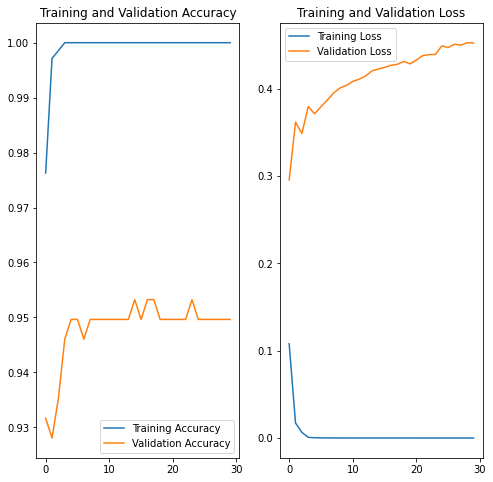

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='middle right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='middle right')
plt.title('Training and Validation Loss')

plt.show()

- plots training and validation accuracies and losses

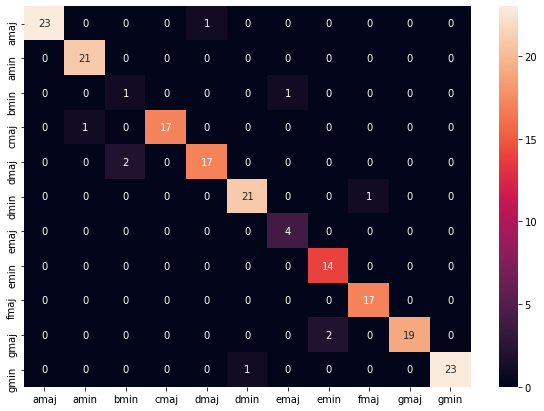

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y_test], axis=0)
array_1 = confusion_matrix(predicted_categories, true_categories, normalize=None)
df_cm = pd.DataFrame(array_1, index = [i for i in ['amaj', 'amin', 'bmin', 'cmaj', 'dmaj','dmin', 'emaj', 'emin', 'fmaj', 'gmaj', 'gmin']],
                  columns = [i for i in ['amaj', 'amin', 'bmin', 'cmaj', 'dmaj','dmin', 'emaj', 'emin', 'fmaj', 'gmaj', 'gmin']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


- plots confusion matrix for test data of this model

In [ ]:
model.load_weights('/content/drive/MyDrive/project/multiclass key models/reduced keys more data/model_epoch15-loss0.4224')

- loads in the weights at the point that minimised validation loss during training

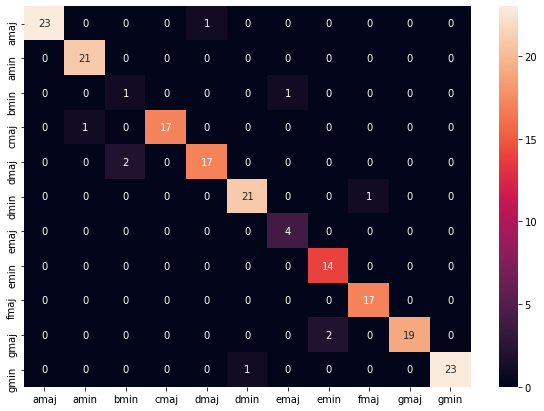

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y_test], axis=0)
array_2 = confusion_matrix(predicted_categories, true_categories, normalize=None)
df_cm = pd.DataFrame(array_2, index = [i for i in ['amaj', 'amin', 'bmin', 'cmaj', 'dmaj','dmin', 'emaj', 'emin', 'fmaj', 'gmaj', 'gmin']],
                  columns = [i for i in ['amaj', 'amin', 'bmin', 'cmaj', 'dmaj','dmin', 'emaj', 'emin', 'fmaj', 'gmaj', 'gmin']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

- plots a confusion matrix for the weight-optimised model

In [ ]:
import numpy as np
vers = [array_1, array_2]
all_outcomes_ = np.empty((2,11,4), dtype= int)
for x in range(0,2):
  print('TP FP FN TN')
  outcomes = np.empty((11,4), dtype= int)
  array = np.array(vers[x])
  a = sum(array)
  all_vals = sum(a)
  #0 = tp
  #1 = fp
  #2 = fn
  #3 = tn
  for i in range(0,11):
    mid = 0
    outcomes[i][0] = array[i][i]
    outcomes[i][1] = sum(array[i][:]) - array[i][i]
    for j in range(0,11):
      mid += array[j][i]
    outcomes[i][2] = mid - array[i][i]
    outcomes[i][3] = all_vals - (outcomes[i][0] + outcomes[i][1] + outcomes[i][2])
  print(outcomes)
  print('---------')
  all_outcomes_[x][:][:] = outcomes

TP FP FN TN
[[ 23   1   0 162]
 [ 21   0   1 164]
 [  1   1   2 182]
 [ 17   1   0 168]
 [ 17   2   1 166]
 [ 21   1   1 163]
 [  4   0   1 181]
 [ 14   0   2 170]
 [ 17   0   1 168]
 [ 19   2   0 165]
 [ 23   1   0 162]]
---------
TP FP FN TN
[[ 23   1   0 162]
 [ 21   0   1 164]
 [  1   1   2 182]
 [ 17   1   0 168]
 [ 17   2   1 166]
 [ 21   1   1 163]
 [  4   0   1 181]
 [ 14   0   2 170]
 [ 17   0   1 168]
 [ 19   2   0 165]
 [ 23   1   0 162]]
---------


- extracts the TP, FP, FN and TN for each class of the final model and the weight optimised model

In [ ]:
overall = np.zeros((2,4), dtype= float)
i = 0
for x in all_outcomes_ :
  for y in range(0,11):
    overall[i][0] += x[y][0]
    overall[i][1] += x[y][1]
    overall[i][2] += x[y][2]
    overall[i][3] += x[y][3]
  i+=1
print(overall)

[[ 177.    9.    9. 1851.]
 [ 177.    9.    9. 1851.]]


- sums the TP, FP, FN, and TN for each model overall

In [ ]:
metrics_ = np.empty((2,11,4), dtype= float)
i = 0
for x in all_outcomes_:
  for y in range(0,11):
    metrics_[i][y][0] = x[y][0] / (x[y][0] + x[y][1])
    metrics_[i][y][1] = x[y][0] / (x[y][0] + x[y][2])
    metrics_[i][y][2] = x[y][3] / (x[y][3] + x[y][2])
    metrics_[i][y][3] =  2 * metrics_[i][y][0] * metrics_[i][y][1] / (metrics_[i][y][0] + metrics_[i][y][1])
  i+=1
print(metrics_)

[[[0.95833333 1.         1.         0.9787234 ]
  [1.         0.95454545 0.99393939 0.97674419]
  [0.5        0.33333333 0.98913043 0.4       ]
  [0.94444444 1.         1.         0.97142857]
  [0.89473684 0.94444444 0.99401198 0.91891892]
  [0.95454545 0.95454545 0.99390244 0.95454545]
  [1.         0.8        0.99450549 0.88888889]
  [1.         0.875      0.98837209 0.93333333]
  [1.         0.94444444 0.99408284 0.97142857]
  [0.9047619  1.         1.         0.95      ]
  [0.95833333 1.         1.         0.9787234 ]]

 [[0.95833333 1.         1.         0.9787234 ]
  [1.         0.95454545 0.99393939 0.97674419]
  [0.5        0.33333333 0.98913043 0.4       ]
  [0.94444444 1.         1.         0.97142857]
  [0.89473684 0.94444444 0.99401198 0.91891892]
  [0.95454545 0.95454545 0.99390244 0.95454545]
  [1.         0.8        0.99450549 0.88888889]
  [1.         0.875      0.98837209 0.93333333]
  [1.         0.94444444 0.99408284 0.97142857]
  [0.9047619  1.         1.         0.

- calculates the precision, recall, specificity and f-score per class of both models

In [ ]:
overall_metrics = np.empty((2,4), dtype= float)
i =0
for x in overall:
  print(x)
  overall_metrics[i][0] = x[0] / (x[0] + x[1])
  overall_metrics[i][1] = x[0] / (x[0] + x[2])
  overall_metrics[i][2] = x[3] / (x[3] + x[2])
  overall_metrics[i][3] =  2 * overall_metrics[i][0] * overall_metrics[i][1] / (overall_metrics[i][0] + overall_metrics[i][1])
  i+=1
print(overall_metrics)

[ 177.    9.    9. 1851.]
[ 177.    9.    9. 1851.]
[[0.9516129  0.9516129  0.99516129 0.9516129 ]
 [0.9516129  0.9516129  0.99516129 0.9516129 ]]


- calculates overall precision, recall and f-measure for the model

In [ ]:
model.save('/content/drive/MyDrive/project/multiclass key models/final model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/project/multiclass key models/final model/assets


- saves the best model as the final model

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/project/multiclass key models/final model')

- loads in the best model

In [ ]:
import glob
import tensorflow as tf
import numpy as np

img_height = 288
img_width = 432

a_dor = []
a_mix = []
d_mix = []
e_dor = []
data = []
count = 0
for i in  glob.glob('/content/drive/MyDrive/project/key_images/ador/*.*'):
  image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
  image=np.array(image)
  a_dor.append(image)
  count+=1
  if count >4:
    break
count = 0
for i in  glob.glob('/content/drive/MyDrive/project/key_images/amix/*.*'):
  image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
  image=np.array(image)
  a_mix.append(image)
  count+=1
  if count >4:
    break
count = 0
for i in  glob.glob('/content/drive/MyDrive/project/key_images/dmix/*.*'):
  image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
  image=np.array(image)
  d_mix.append(image)
  count+=1
  if count >4:
    break
count = 0
for i in  glob.glob('/content/drive/MyDrive/project/key_images/edor/*.*'):
  image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (img_width,img_height))
  image=np.array(image)
  e_dor.append(image)
  count+=1
  if count >4:
    break

- loads in 5 images of each of the mode class to see how the model predicts for the modes

In [ ]:
a_dor = np.array(a_dor)
a = model.predict_classes(a_dor)
print(a)
a_mix = np.array(a_mix)
print(model.predict_classes(a_mix))
d_mix = np.array(d_mix)
print(model.predict_classes(d_mix))
e_dor = np.array(e_dor)
print(model.predict_classes(e_dor))

[7 7 7 9 7]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


- prints which classes are predicted for each mode